In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

Julia Pawluś, Kamil Sarzyniak, Piotr Stawarski
- Projekt 1 z przedmiotu Ekonometrii Przestrzennej

W projekcie przeanalizowano autokorelację przestrzenną przestępczości na poziomie województw, wykorzystując dane  z Głównego Urzędu Statystycznego (GUS) obejmujące liczbę przestępstw stwierdzonych przez Policję w zakończonych postępowaniach przygotowawczych i liczbę ludności w 2020 roku. Obliczono wskaźniki przestępczości na mieszkańca, aby umożliwić porównanie między regionami. W badaniu wykorzystano globalne miary autokorelacji przestrzennej, takie jak  statystyka 𝐼  Morana, statystyka 𝐶 Geary’ego oraz statystyka 𝐺 Getisa i Orda oraz używając dwóch rodzajów macierzy wag: macierzy sąsiedztwa oraz macierzy KNN (bazującej na najbliższych sąsiadach).

In [2]:
woj = pd.read_csv("przestepstwa.csv")
woj_map = "wojewodztwa.shp"
woj_m = gpd.read_file(woj_map)
ludnosc_woj = pd.read_csv("powierzchnia_i_ludnosc.csv")

In [3]:
woj

,oid,kod KTS,województwo,powierzchnia,rok,TERYT,Przestępstwa stwierdzone przez Policję w zakończonych postępowaniach przygotowawczych wg powiatów (dane kwartalne)|rok|przestępstwa stwierdzone|ogółem
0,1,11200000000,małopolskie,15183.0,2020,12,69174.0
1,2,12400000000,śląskie,12333.0,2020,24,117632.0
2,3,20800000000,lubuskie,13988.0,2020,8,24531.0
3,4,23000000000,wielkopolskie,29826.0,2020,30,58900.0
4,5,23200000000,zachodniopomorskie,22905.0,2020,32,35325.0
5,6,30200000000,dolnośląskie,19947.0,2020,2,74802.0
6,7,31600000000,opolskie,9412.0,2020,16,15710.0
7,8,40400000000,kujawsko-pomorskie,17971.0,2020,4,37172.0
8,9,42200000000,pomorskie,18323.0,2020,22,49381.0
9,10,42800000000,warmińsko-mazurskie,24173.0,2020,28,26295.0


In [4]:
woj.drop(['oid', 'kod KTS', 'powierzchnia', 'rok', 'TERYT'], axis=1, inplace=True)
woj.rename(columns={'województwo': 'JPT_NAZWA_'}, inplace=True)
woj.rename(columns={
    'Przestępstwa stwierdzone przez Policję w zakończonych postępowaniach przygotowawczych wg powiatów (dane kwartalne)|rok|przestępstwa stwierdzone|ogółem': 'Przestępstwa'
}, inplace=True)
woj

,JPT_NAZWA_,Przestępstwa
0,małopolskie,69174.0
1,śląskie,117632.0
2,lubuskie,24531.0
3,wielkopolskie,58900.0
4,zachodniopomorskie,35325.0
5,dolnośląskie,74802.0
6,opolskie,15710.0
7,kujawsko-pomorskie,37172.0
8,pomorskie,49381.0
9,warmińsko-mazurskie,26295.0


In [5]:
woj.describe()

,Przestępstwa
count,16.000000
mean,47838.000000
std,31133.054732
min,15710.000000
25%,25854.000000
50%,36248.500000
75%,61468.500000
max,117632.000000


In [6]:
woj.dtypes

JPT_NAZWA_       object
Przestępstwa    float64
dtype: object

In [7]:
ludnosc_woj

,JPT_NAZWA_,Ludność
0,dolnośląskie,2900163
1,kujawsko-pomorskie,2072373
2,lubelskie,2108270
3,lubuskie,1011592
4,łódzkie,2454779
5,małopolskie,3410901
6,mazowieckie,5423168
7,opolskie,982626
8,podkarpackie,2127164
9,podlaskie,1178353


In [8]:
merged_df = woj.merge(ludnosc_woj, on='JPT_NAZWA_')

In [9]:
merged_df['Przestępstwa_średnia'] = (merged_df['Przestępstwa'] / merged_df['Ludność']) 

In [10]:
print(merged_df[['JPT_NAZWA_', 'Przestępstwa', 'Ludność', 'Przestępstwa_średnia']])

             JPT_NAZWA_  Przestępstwa  Ludność  Przestępstwa_średnia
0           małopolskie       69174.0  3410901              0.020280
1               śląskie      117632.0  4517635              0.026038
2              lubuskie       24531.0  1011592              0.024250
3         wielkopolskie       58900.0  3498733              0.016835
4    zachodniopomorskie       35325.0  1696193              0.020826
5          dolnośląskie       74802.0  2900163              0.025792
6              opolskie       15710.0   982626              0.015988
7    kujawsko-pomorskie       37172.0  2072373              0.017937
8             pomorskie       49381.0  2343928              0.021068
9   warmińsko-mazurskie       26295.0  1422737              0.018482
10              łódzkie       44680.0  2454779              0.018201
11       świętokrzyskie       22683.0  1233961              0.018382
12            lubelskie       29057.0  2108270              0.013782
13         podkarpackie       3221

In [11]:
woj = merged_df[['JPT_NAZWA_', 'Przestępstwa_średnia']]
print(woj)

             JPT_NAZWA_  Przestępstwa_średnia
0           małopolskie              0.020280
1               śląskie              0.026038
2              lubuskie              0.024250
3         wielkopolskie              0.016835
4    zachodniopomorskie              0.020826
5          dolnośląskie              0.025792
6              opolskie              0.015988
7    kujawsko-pomorskie              0.017937
8             pomorskie              0.021068
9   warmińsko-mazurskie              0.018482
10              łódzkie              0.018201
11       świętokrzyskie              0.018382
12            lubelskie              0.013782
13         podkarpackie              0.015144
14            podlaskie              0.014929
15          mazowieckie              0.020331


In [12]:
print(woj.sort_values(by='Przestępstwa_średnia', ascending=False))


             JPT_NAZWA_  Przestępstwa_średnia
1               śląskie              0.026038
5          dolnośląskie              0.025792
2              lubuskie              0.024250
8             pomorskie              0.021068
4    zachodniopomorskie              0.020826
15          mazowieckie              0.020331
0           małopolskie              0.020280
9   warmińsko-mazurskie              0.018482
11       świętokrzyskie              0.018382
10              łódzkie              0.018201
7    kujawsko-pomorskie              0.017937
3         wielkopolskie              0.016835
6              opolskie              0.015988
13         podkarpackie              0.015144
14            podlaskie              0.014929
12            lubelskie              0.013782


<Axes: >

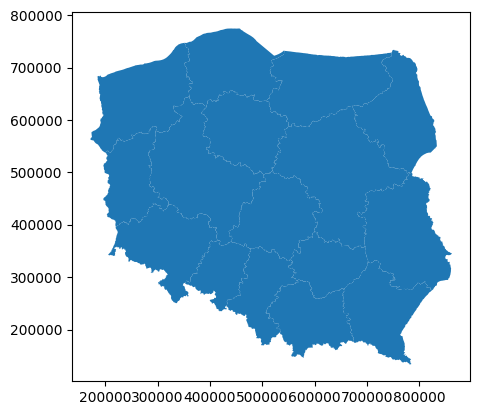

In [13]:
woj_m.plot(legend=True)

In [14]:
woj_m.head()

,gml_id,JPT_SJR_KO,JPT_POWIER,JPT_KOD_JE,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,...,JPT_ID,JPT_POWI_1,JPT_KJ_I_3,JPT_GEOMET,JPT_GEOM_1,SHAPE_LENG,SHAPE_AREA,REGON,RODZAJ,geometry
0,None,WOJ,2289315,32,zachodniopomorskie,None,0,20220613,0,20120926,...,1364544,0,None,0,0,12.1323542862,3.10794349875,81168387600000,wojewodztwo,"POLYGON ((188256.168 683730.875, 189761.898 68..."
1,None,WOJ,1398751,08,lubuskie,None,0,20211210,0,20120926,...,1361674,0,None,0,0,11.0914310011,1.83850176383,97789593100000,wojewodztwo,"POLYGON ((249058.528 411232.826, 249030.522 41..."
2,None,WOJ,1994777,02,dolnośląskie,None,0,20221019,0,20120926,...,1365817,0,None,0,0,13.846094171,2.55916927233,93193464400000,wojewodztwo,"POLYGON ((351910.997 289041.305, 351818.002 28..."
3,None,WOJ,2982700,30,wielkopolskie,None,0,20220330,0,20120926,...,1363546,2982700,None,0,0,18.4097920287,3.93220020515,63125781600000,wojewodztwo,"POLYGON ((441690.785 515930.957, 441724.727 51..."
4,None,WOJ,1831001,22,pomorskie,None,0,20220906,0,20120926,...,1365552,0,None,0,0,11.7084107024,2.68945114136,19167483600000,wojewodztwo,"POLYGON ((488665.467 751328.589, 488780.891 75..."


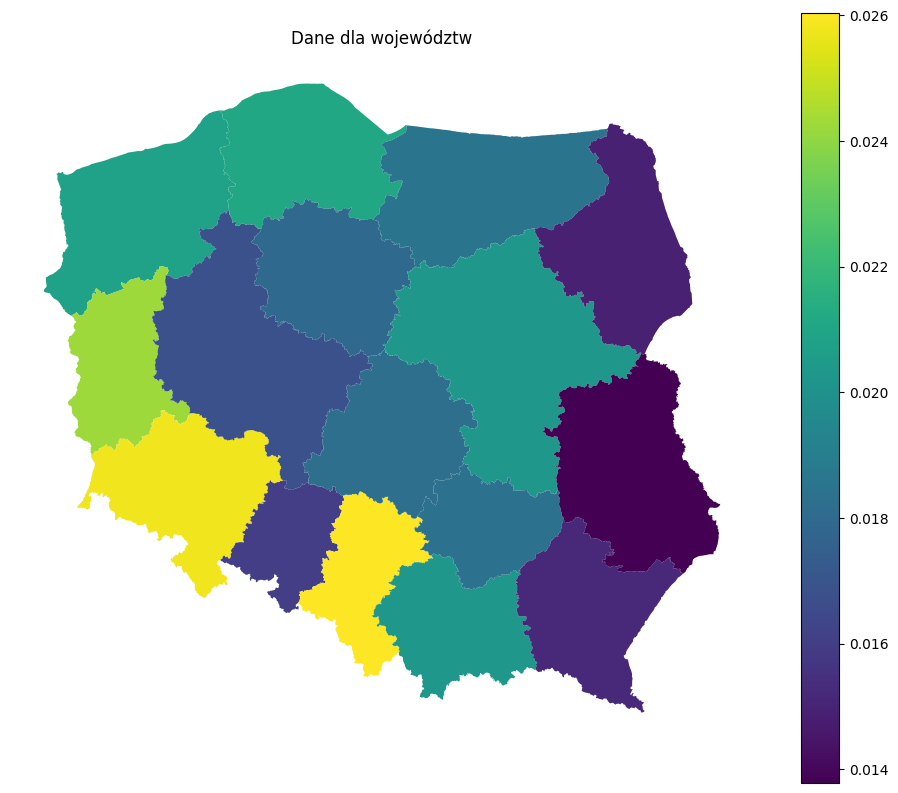

In [15]:
merged_woj = woj_m.merge(woj, on='JPT_NAZWA_')

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged_woj.plot(column='Przestępstwa_średnia',
               ax=ax,
               legend=True)
ax.set_axis_off()
plt.title('Dane dla województw')
plt.show()

Mapa przedstawia wskaźniki przestępczości na mieszkańca w poszczególnych województwach Polski w 2020 roku. Najwyższe wskaźniki zanotowano w województwach śląskim (0,0260 przestępstw na mieszkańca, populacja: 4 517 635), dolnośląskim (0,0258 przestępstw na mieszkańca, populacja: 2 900 163) i lubuskim (0,0243 przestępstw na mieszkańca, populacja: 1 011 592). Z kolei najniższe wskaźniki odnotowano w podkarpackim (0,0151 przestępstw na mieszkańca, populacja: 2 127 164), podlaskim (0,0149 przestępstw na mieszkańca, populacja: 1 178 353) i lubelskim (0,0138 przestępstw na mieszkańca, populacja: 2 108 270). Kolor żółty oznacza wyższy poziom przestępczości, natomiast ciemny fiolet oznacza niższy.

In [16]:
import numpy as np
from esda.moran import Moran
from esda.geary import Geary
from esda.getisord import G, G_Local
from pysal.lib import weights

In [17]:
data_column = 'Przestępstwa_średnia'

w = weights.Queen.from_dataframe(merged_woj)
w.transform = 'r'

C:\Users\KamilSarzyniak\AppData\Local\Temp\ipykernel_10788\3448626889.py:3: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = weights.Queen.from_dataframe(merged_woj)


#Analizy przy użyciu wag sąsiedztwa

In [ ]:
y = merged_woj[data_column]
moran_woj = Moran(y, w)
print("Moran's I:", moran_woj.I)           # Wartość statystyki Moran's I
print("E(I):", moran_woj.EI)               # Wartość oczekiwana E(I)
print("Var(I):", moran_woj.VI_sim)         # Wariancja Var(I)
print("Z(I):", moran_woj.z_sim)            # Statystyka Z(I)
print("p-value:", moran_woj.p_sim)         # Wartość p

Moran's I: 0.07664418431286983
E(I): -0.06666666666666667
Var(I): 0.022754843082689977
Z(I): 0.9719648338725134
p-value: 0.167


Statystyka 𝐼 Morana:
- 𝐻0: 𝑏𝑟𝑎𝑘 𝑎𝑢𝑡𝑜𝑘𝑜𝑟𝑒𝑙𝑎𝑐𝑗𝑖 𝑝𝑟𝑧𝑒𝑠𝑡𝑟𝑧𝑒𝑛𝑛𝑒𝑗 (wartości cechy 𝑋, czyli przestępczości są rozłożone losowo)
- H1: występuje autokorelacja przestrzenna

Wartość statystyki 𝐼 Morana wynosi 0.069, co wskazuje na bardzo słabą autokorelację przestrzenną przestępczości między województwami. Jednak wartość p = 0.132 jest większa niż poziom istotności 0.05, więc nie mamy podstaw do odrzucenia hipotezy zerowej. To oznacza, że nie wykryto istotnych przestrzennych wzorców przestępczości, więc rozkład przestępczości między województwami jest losowy.Ponieważ 𝐼>𝐸(𝐼) oraz 𝑍(𝐼)>0, można wyciągnąć wniosek, że w przypadku badanych przestępstw występuje bardzo słaba dodatnia autokorelacja. Jednak ze względu na brak istotności statystycznej (p > 0.05) nie można uznać tej autokorelacji za znaczącą.

In [19]:
geary_woj = Geary(y, w)
print("Geary's C:", geary_woj.C)
print("E(C):", geary_woj.EC)                # Wartość oczekiwana E(C)
print("Var(C):", geary_woj.VC_sim)         # Wariancja Var(C)
print("Z(C):", geary_woj.z_sim)            # Statystyka Z(C)
print("p-value:", geary_woj.p_sim)          # Wartość p

Geary's C: 0.8048204714759354
E(C): 1.0
Var(C): 0.023493508082260094
Z(C): -1.2799016680817805
p-value: 0.109


Statystyka 𝐶 Geary’ego
- 𝐻0: 𝑏𝑟𝑎𝑘 𝑎𝑢𝑡𝑜𝑘𝑜𝑟𝑒𝑙𝑎𝑐𝑗𝑖 𝑝𝑟𝑧𝑒𝑠𝑡𝑟𝑧𝑒𝑛𝑛𝑒𝑗 
- H1: występuje autokorelacja przestrzenna
- Choć wartość Geary's C wskazuje na dodatnią autokorelację ponieważ 0 < 𝐶 < 1, 𝑍C < 0, to wynik nie jest istotny statystycznie (p-value > 0.05), więc nie mamy podstaw do odrzucenia hipotezy zerowej.  Oznacza to, że przestępczość między województwami może mieć pewną słabą tendencję do grupowania, ale nie jest to wynik wystarczająco silny, by uznać go za istotny w sensie statystycznym.

In [20]:
g_woj = G(y, w)
print("Global Getis-Ord G:", g_woj.G)
print("p-value", g_woj.p_sim)           

Global Getis-Ord G: 0.2773290388481809
p-value 0.276


In [21]:
g_local_woj = G_Local(y, w)
print("Local G* values:", g_local_woj.Zs)

Local G* values: [ 0.42016993  0.63726732  0.05847825  0.31404855 -0.16972587  0.61652451
 -0.10034932 -0.18497409 -0.02311043  0.17660381 -0.20246589 -0.60424537
 -0.0975971  -0.57902238 -0.57185087 -0.71126571]


In [22]:
from splot.esda import moran_scatterplot

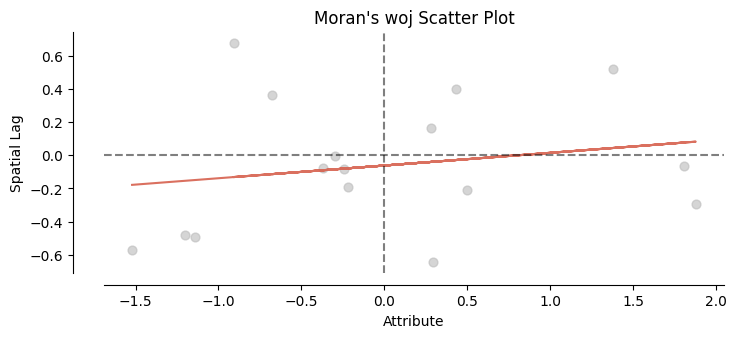

In [23]:
fig, ax = plt.subplots(1, figsize=(8, 6))
moran_scatterplot(moran_woj, ax=ax)
ax.set_title("Moran's woj Scatter Plot")
plt.show()

Wyniki wykresu rozproszenia i statystyki statystyki 𝐼 Morana wskazują na bardzo słabą dodatnią autokorelację przestrzenną, co sugeruje, że przestępczość w województwach wykazuje pewną tendencję do grupowania, ale efekt jest minimalny i nieistotny statystycznie.

In [24]:
import seaborn as sns

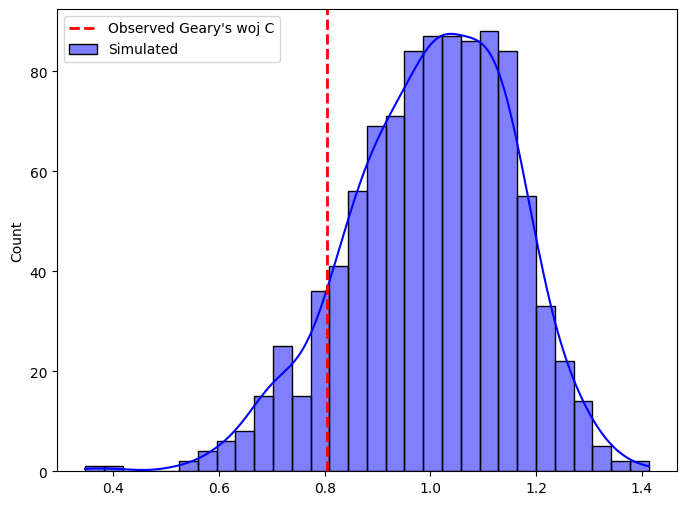

In [25]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(geary_woj.sim, bins=30, kde=True, color='blue', label="Simulated")
plt.axvline(geary_woj.C, color='red', linestyle="--", linewidth=2, label="Observed Geary's woj C")
plt.legend()
plt.show()

Wykres przedstawia rozkład symulowanych wartości Geary's C (niebieska krzywa) oraz obserwowaną wartość Geary's C (czerwona przerywana linia). Obserwowana wartość mieści się w zakresie wyników uzyskanych z symulacji, co sugeruje, że w danych nie występuje istotna autokorelacja przestrzenna. Oznacza to, że przestępczość między województwami rozkłada się losowo, bez wyraźnych wzorców przestrzennych

In [ ]:
sns.pairplot(moran_woj_knn)
plt.show

TypeError: 'data' must be pandas DataFrame object, not: <class 'esda.moran.Moran'>

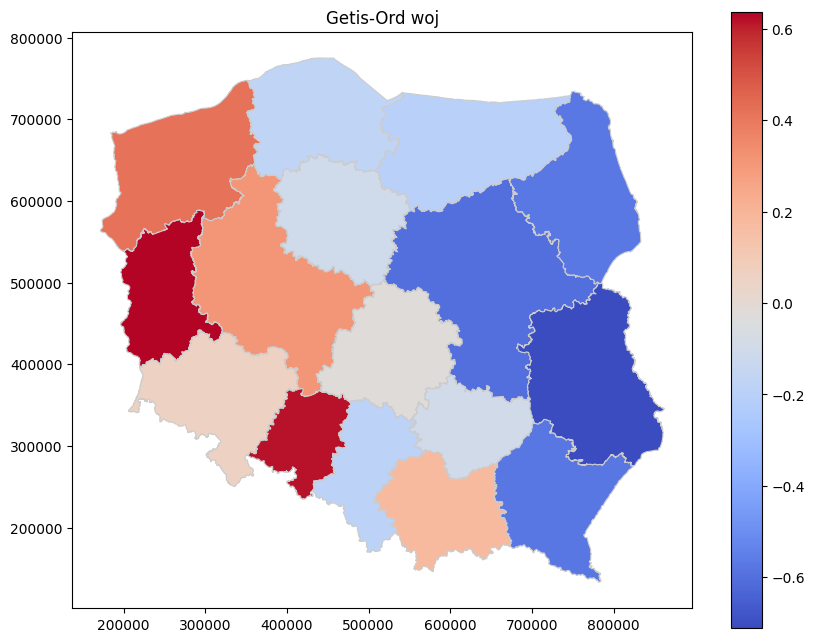

In [26]:
merged_woj['GetisOrd_G_Z'] = g_local_woj.Zs

# Plot Getis-Ord G* Z-scores
fig, ax = plt.subplots(1, figsize=(10, 8))
merged_woj.plot(column='GetisOrd_G_Z', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title("Getis-Ord woj")
plt.show()

In [27]:
from libpysal.weights import DistanceBand
from libpysal.weights import KNN

#Analizy przy użyciu wag KNN

In [28]:
data_column = 'Przestępstwa_średnia'

w_knn = KNN.from_dataframe(merged_woj)

In [29]:
y_knn = merged_woj[data_column]
moran_woj_knn = Moran(y_knn, w_knn)
print("Moran's I:", moran_woj_knn.I)
print("E(I):", moran_woj_knn.EI)
print("Var(I):", moran_woj_knn.VI_sim)
print("Z(I):", moran_woj_knn.z_sim)
print("p-value:", moran_woj_knn.p_sim)

Moran's I: 0.009323089163557455
E(I): -0.06666666666666667
Var(I): 0.04678899428153861
Z(I): 0.39832041317789657
p-value: 0.35


In [30]:
geary_woj_knn = Geary(y_knn, w_knn)
print("Geary's C:", geary_woj_knn.C)
print("E(C):", geary_woj_knn.EC)
print("Var(C):", geary_woj_knn.VC_sim)
print("Z(C):", geary_woj_knn.z_sim)
print("p-value:", geary_woj_knn.p_sim)

Geary's C: 0.8705614667314351
E(C): 1.0
Var(C): 0.05038286233544396
Z(C): -0.5778258783467141
p-value: 0.285


Zastosowanie metody wag KNN w analizie statystyki 𝐼 Morana oraz Geary's C wskazuje na brak istotnej autokorelacji przestrzennej, ponieważ wartość p > 0.05.

- dla statystyki Geary's C, wartość C = 0.8706 (czyli 0 < C < 1) oraz Z(C) < 0 sugerują dodatnią autokorelację, ale jest ona bardzo słaba.
- dla statystyki 𝐼 Morana, I > E(I) oraz Z(I) > 0 również wskazują na bardzo słabą dodatnią autokorelację przestrzenną.
Mimo tej dodatniej autokorelacji, brak istotności statystycznej (p > 0.05) oznacza, że przestępczość między województwami rozkłada się losowo, bez wyraźnych przestrzennych wzorców. Wynik ten jest zgodny z wcześniejszymi analizami, które sugerowały, że rozkład przestępczości w Polsce nie wykazuje silnych zależności przestrzennych.

In [31]:
g_woj_knn = G(y_knn, w_knn)
print("Global Getis-Ord G:", g_woj_knn.G)
print("p-value", g_woj_knn.p_sim)

Global Getis-Ord G: 0.13793957161712952
p-value 0.079


In [32]:
g_local_woj_knn = G_Local(y_knn, w_knn)
print("Local G* values:", g_local_woj_knn.Zs)

Local G* values: [ 0.94484016  0.68398182  0.39103965  0.45400249  0.06361632  1.77660226
 -0.10904018 -0.20919316  0.00514233  0.81086404 -0.45423978 -0.70850596
 -0.02283816 -0.05909425 -0.04214971 -0.83788044]


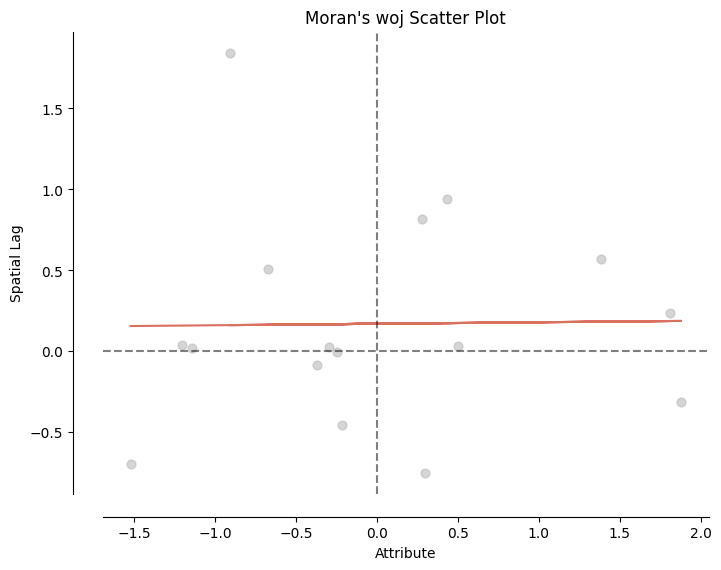

In [33]:
fig, ax = plt.subplots(1, figsize=(8, 6))
moran_scatterplot(moran_woj_knn, ax=ax)
ax.set_title("Moran's woj Scatter Plot")
plt.show()

Wykres rozproszenia dla statystyki statystyki 𝐼 Morana sugeruje, że nie ma wyraźnej i silnej autokorelacji przestrzennej, ponieważ punkty nie grupują się wyraźnie w kwadrantach High-High lub Low-Low. Wynik ten jest zgodny z wcześniejszymi wynikami statystyki statystyki 𝐼 Morana, gdzie wartość była bliska zeru, a p-value nie wskazywało istotności.

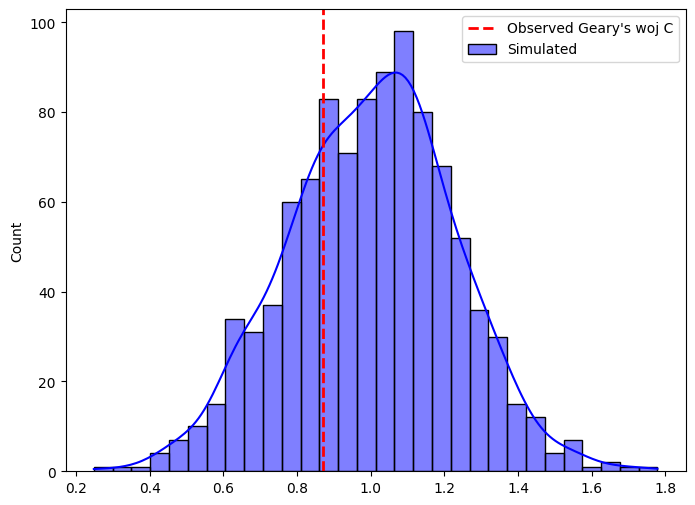

In [34]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(geary_woj_knn.sim, bins=30, kde=True, color='blue', label="Simulated")
plt.axvline(geary_woj_knn.C, color='red', linestyle="--", linewidth=2, label="Observed Geary's woj C")
plt.legend()
plt.show()

Wykres pokazuje symulowany rozkład Geary's C (niebieska krzywa) oraz obserwowaną wartość (czerwona linia), która wynosi ponad 0.8, wskazując na słabą dodatnią autokorelację przestrzenną. Mimo to, ponieważ obserwowana wartość mieści się w obrębie rozkładu symulowanego, wynik nie jest istotny statystycznie, co sugeruje, że przestępczość między województwami rozkłada się losowo, bez wyraźnych wzorców przestrzennych.

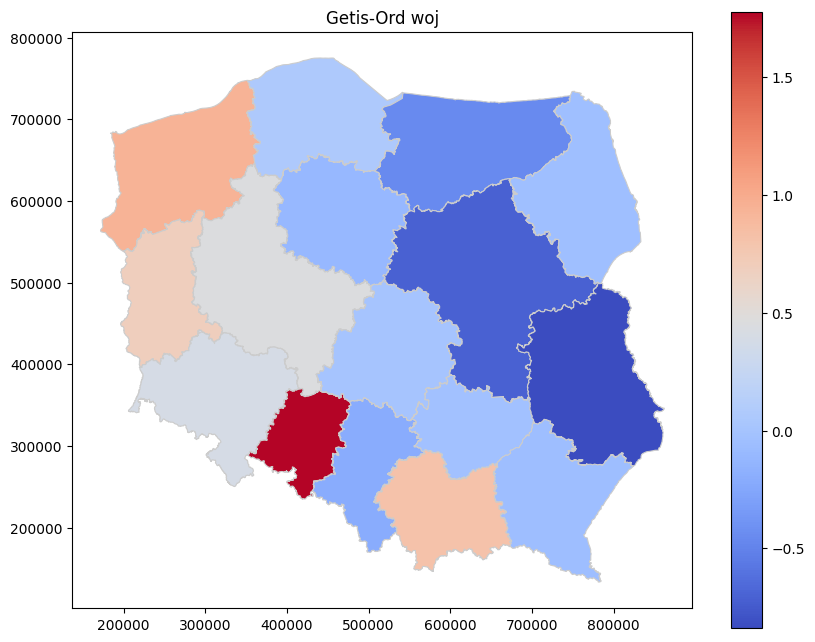

In [35]:
merged_woj['GetisOrd_G_Z'] = g_local_woj_knn.Zs

# Plot Getis-Ord G* Z-scores
fig, ax = plt.subplots(1, figsize=(10, 8))
merged_woj.plot(column='GetisOrd_G_Z', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title("Getis-Ord woj")
plt.show()

In [36]:
from esda.moran import Moran
from pysal.lib import weights


y = merged_woj[data_column]
w = weights.KNN.from_dataframe(merged_woj, k=5)  # przykładowa macierz sąsiedztwa

# Tworzymy statystykę Morana z określoną liczbą permutacji (np. 999)
moran_woj = Moran(y, w, permutations=999)

# Wyświetlamy wyniki
print("Moran's I:", moran_woj.I)
print("p-value:", moran_woj.p_sim)

Moran's I: 0.06918611044666718
p-value: 0.113


In [51]:
y = merged_woj[data_column]
w = weights.KNN.from_dataframe(merged_woj, k=5)  # przykładowa macierz sąsiedztwa

# Tworzymy statystykę Morana z określoną liczbą permutacji (np. 999)
geary_woj = Geary(y, w, permutations=999)

# Wyświetlamy wyniki
print("Geary's C:", geary_woj.C)
print("p-value:", geary_woj.p_sim)

Geary's C: 0.840430304196158
p-value: 0.103


In [53]:
y = merged_woj[data_column]
w = weights.KNN.from_dataframe(merged_woj, k=5)  # przykładowa macierz sąsiedztwa

# Tworzymy statystykę Morana z określoną liczbą permutacji (np. 999)
g_woj = G(y, w, permutations=999)

# Wyświetlamy wyniki
print("Global Getis-Ord G:", g_woj.G)
print("p-value:", g_woj.p_sim)

Global Getis-Ord G: 0.3359600847232856
p-value: 0.334
